In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('/Volumes/Windows SD/Master SSE/Machine Learning/machine_learning_with_python_jadi-main/FuelConsumption.csv')


In [64]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [65]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [66]:
print (f' lenth of data: {len(df)}')

lst = list(range(1, len(df) + 1))
# print(lst)

 lenth of data: 1067


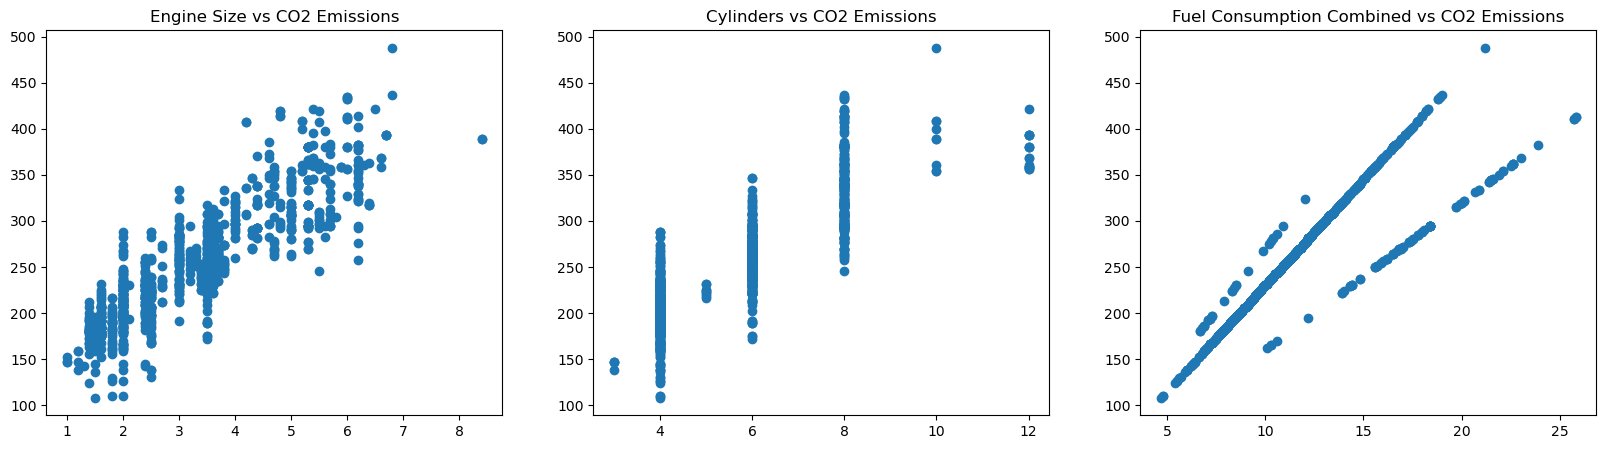

In [67]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
ax[0].set_title('Engine Size vs CO2 Emissions')

ax[1].scatter(df['CYLINDERS'], df['CO2EMISSIONS'])
ax[1].set_title('Cylinders vs CO2 Emissions')

ax[2].scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'])
ax[2].set_title('Fuel Consumption Combined vs CO2 Emissions')

plt.show()

In [68]:
# Creating sub dataframe for training
sub_df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
sub_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


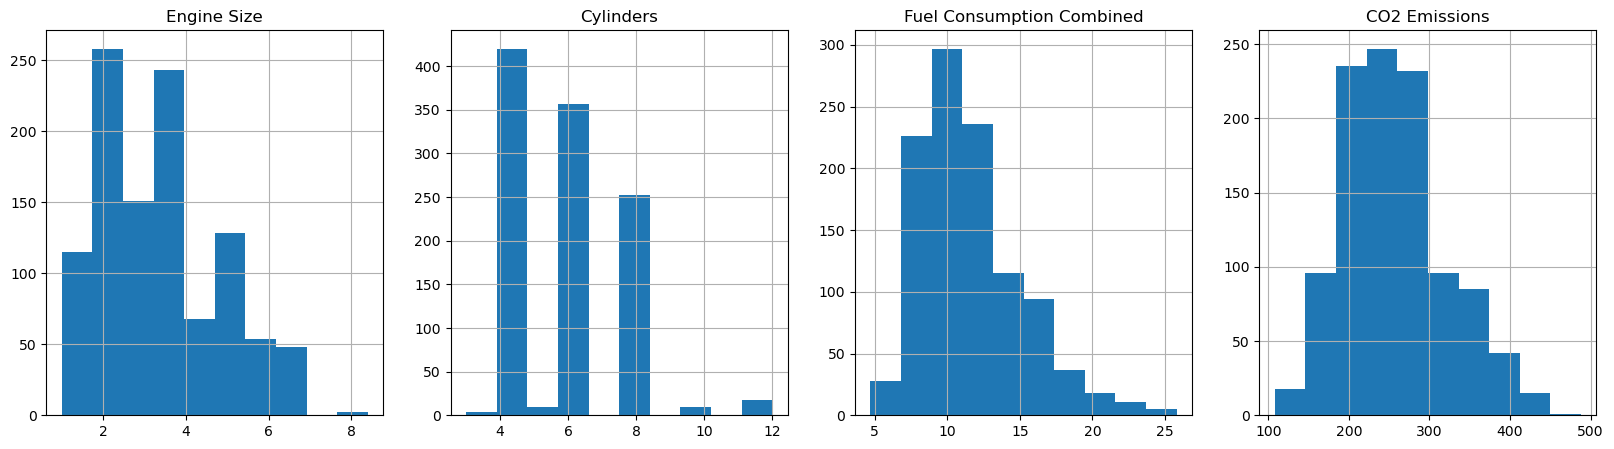

In [69]:
# plot histograms of sub_df contain ENGINESIZE, CYLINDERS, FUELCONSUMPTION_COMB, CO2EMISSIONS
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sub_df['ENGINESIZE'].hist(ax=ax[0])
ax[0].set_title('Engine Size')

sub_df['CYLINDERS'].hist(ax=ax[1])
ax[1].set_title('Cylinders')

sub_df['FUELCONSUMPTION_COMB'].hist(ax=ax[2])
ax[2].set_title('Fuel Consumption Combined')

sub_df['CO2EMISSIONS'].hist(ax=ax[3])
ax[3].set_title('CO2 Emissions')

plt.show()


In [70]:
# Creat mask and splitting the data into training and testing data
mask = np.random.rand(len(sub_df)) < 0.8
print(mask)
train = sub_df[mask]
test = sub_df[~mask]

[ True  True  True ...  True  True False]


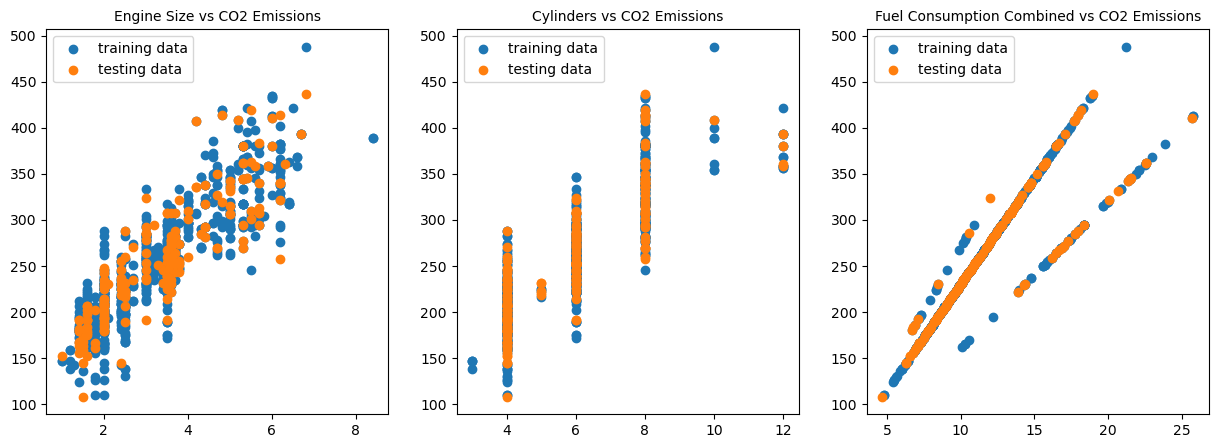

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], label='training data')
ax[0].scatter(test['ENGINESIZE'], test['CO2EMISSIONS'], label='testing data')
ax[0].set_title('Engine Size vs CO2 Emissions', fontsize=10)
ax[0].legend()

ax[1].scatter(train['CYLINDERS'], train['CO2EMISSIONS'], label='training data')
ax[1].scatter(test['CYLINDERS'], test['CO2EMISSIONS'], label='testing data')
ax[1].set_title('Cylinders vs CO2 Emissions', fontsize=10)
ax[1].legend()

ax[2].scatter(train['FUELCONSUMPTION_COMB'], train['CO2EMISSIONS'], label='training data')
ax[2].scatter(test['FUELCONSUMPTION_COMB'], test['CO2EMISSIONS'], label='testing data')
ax[2].set_title('Fuel Consumption Combined vs CO2 Emissions', fontsize=10)
ax[2].legend()


plt.show()


In [72]:
from sklearn import linear_model

In [73]:
regresion = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regresion.fit(train_x, train_y)

LinearRegression()

In [74]:
# print the coefficients
print ('Coefficients: ', regresion.coef_)
print ('Intercept: ',regresion.intercept_)

Coefficients:  [[39.01588127]]
Intercept:  [125.50388284]


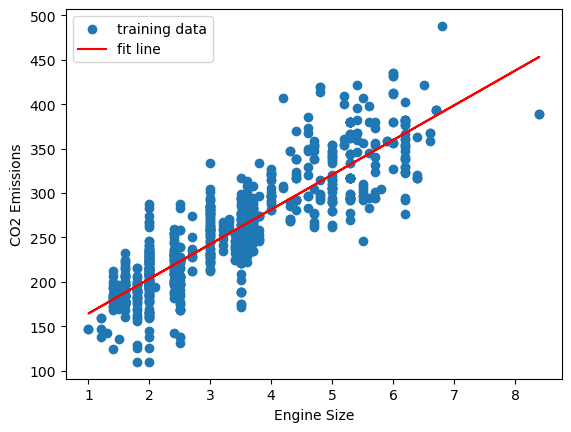

In [75]:
# plot the fit line over the data
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'],  label='training data')
plt.plot(train_x, regresion.coef_[0][0]*train_x + regresion.intercept_[0],'-r' , label='fit line')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

## checking error and fited model:

In [76]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_P = regresion.predict(test_x)

print(f'Mean absolute error: {np.mean(np.absolute(test_y_P - test_y))}')
print(f'Mean Squared error: {np.mean((test_y_P - test_y) ** 2)}')
print(f'R2-score: {r2_score(test_y_P, test_y)}')

Mean absolute error: 23.79638354282898
Mean Squared error: 987.6260367742144
R2-score: 0.6861656210034859


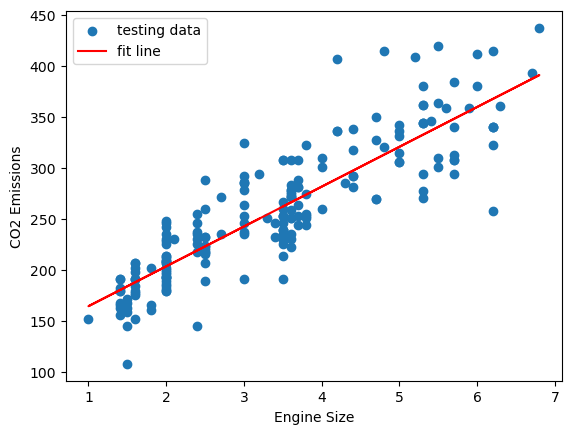

In [77]:
plt.scatter(test_x, test_y, label='testing data')
plt.plot(test_x, test_y_P, '-r', label='fit line')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

## Multiple Linear Regression:

In [78]:
# Multiple Linear Regression
regresion_m = linear_model.LinearRegression()
train_x_m = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
train_y_m = np.asanyarray(train[['CO2EMISSIONS']])
regresion_m.fit(train_x_m, train_y_m)

LinearRegression()

In [79]:
# print the coefficients
print ('Coefficients: ', regresion_m.coef_)
print ('Intercept: ',regresion_m.intercept_)


Coefficients:  [[10.4998111   7.5405802   9.89805844]]
Intercept:  [63.04335339]


In [80]:
test_y_P_m = regresion_m.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_x_m = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
print(f'Mean absolute error: {np.mean(np.absolute(test_y_P_m - test_y))}')
print(f'Mean Squared error: {np.mean((test_y_P_m - test_y) ** 2)}')
print(f'R2-score: {r2_score(test_y_P_m, test_y)}')


Mean absolute error: 18.15498392437683
Mean Squared error: 634.7868351117799
R2-score: 0.8392768081684416


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


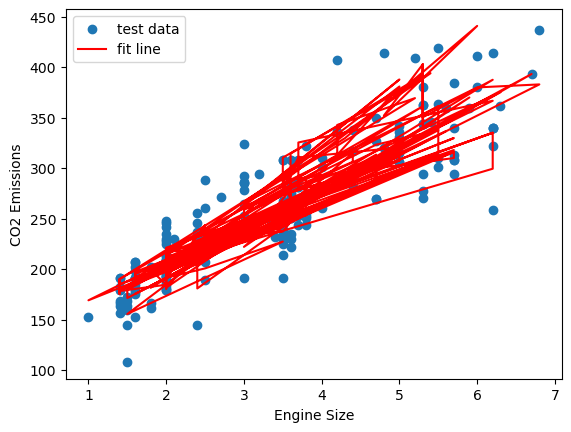

In [81]:
# plot the fit line over the data
plt.scatter(test['ENGINESIZE'], test['CO2EMISSIONS'],  label='test data')
plt.plot(test['ENGINESIZE'],test_y_P_m, '-r', label='fit line')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

In [84]:
y_hat = regresion_m.predict(test_x_m)   
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print(f'Residual sum of squares: {np.mean((y - y_hat) ** 2)}')
print(f'Mean Squared error: {np.mean((y_hat - y) ** 2)}')
print(f'R2-score: {r2_score(y_hat, y)}')

Residual sum of squares: 634.7868351117799
Mean Squared error: 634.7868351117799
R2-score: 0.8392768081684416


## non linear model:

In [85]:
from sklearn.preprocessing import PolynomialFeatures

train_x_non_linear = np.asanyarray(train[['ENGINESIZE']])
train_y_non_linear = np.asanyarray(train[['CO2EMISSIONS']])

test_x_non_linear = np.asanyarray(test[['ENGINESIZE']])
test_y_non_linear = np.asanyarray(test[['CO2EMISSIONS']])

print(train_x_non_linear[:3])
poly_non_linear = PolynomialFeatures(degree=2)
train_x_poly = poly_non_linear.fit_transform(train_x_non_linear)
train_x_poly

[[2. ]
 [2.4]
 [1.5]]


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [86]:
clf = linear_model.LinearRegression()
train_y_P = clf.fit(train_x_poly, train_y_non_linear)

print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.47615385 -1.38971761]]
Intercept:  [108.82718943]


Residual sum of squares: 927.7474767161409
Mean Squared error: 927.7474767161409
R2-score: 0.6943072675230401


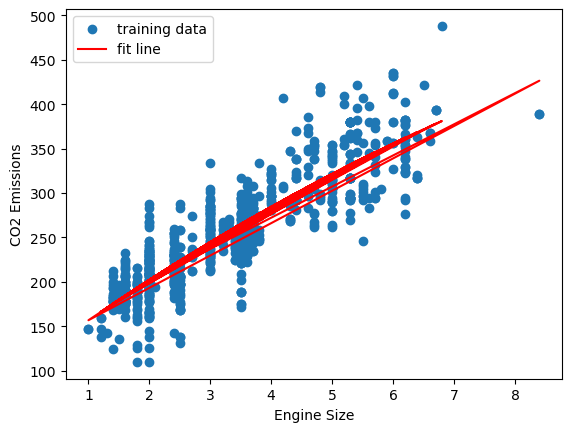

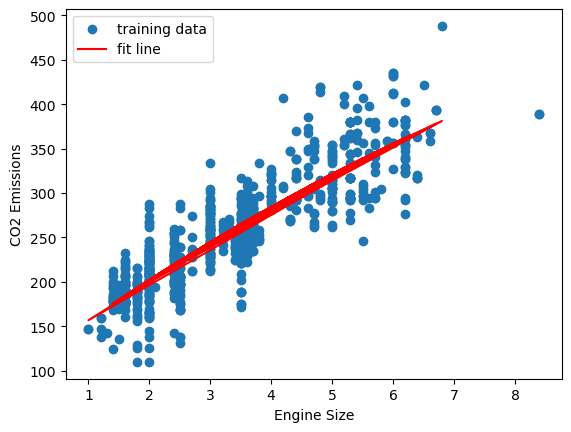

In [94]:
y_hat = clf.predict(train_x_poly)
x = np.asanyarray(train[['ENGINESIZE']])
y = np.asanyarray(train[['CO2EMISSIONS']])
print(f'Residual sum of squares: {np.mean((y - y_hat) ** 2)}')
print(f'Mean Squared error: {np.mean((y_hat - y) ** 2)}')
print(f'R2-score: {r2_score(y_hat, y)}')

# plot the fit line over the data
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'],  label='training data')
plt.plot(train['ENGINESIZE'], y_hat, '-r', label='fit line')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()


scatter = plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'],  label='training data')
plt.plot(test['ENGINESIZE'], clf.coef_[0][1] * test_x_non_linear + clf.coef_[0][2] * (test_x_non_linear ** 2) + clf.intercept_[0], '-r', label='fit line')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x_non_linear)

clf = LinearRegression()
clf.fit(train_x_poly, train_y_non_linear)

# Predict values
train_y_poly_pred = clf.predict(train_x_poly)

# Plot
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], label='training data')
plt.plot(train_x_non_linear, train_y_poly_pred, '-r', label='fit line')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()
